#### 基础知识

我们可以使用拉格朗日多项式 $l_i$ 在给定的插值点 $x_i$ 处对任意函数 $f(x)$ 进行近似，即

$$
f(x) = \sum f(x_i) \cdot l_i(x)
$$

在$x$处的拉格朗日多项式定义如下：

$$ \ell_i^{(N)} (x) \ := \ \prod_{k = 1, \ k \neq i}^{N+1} \frac{x - x_k}{x_i-x_k}, \qquad   i = 1, 2, \dotsc , N + 1  $$

在Python中，它们可以用以下代码实现：

In [1]:
# Setup
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from gll import gll # 返回插值点和权值系数

# Prettier plots.
plt.style.use('ggplot')

In [2]:
def lagrange(N, i, x, xi):
    """
    Function to calculate  Lagrange polynomial for order N
    and polynomial i [0, N] at location x at given collocation points xi
    (not necessarily the GLL-points)
    计算l_i
    """
    fac = 1
    for j in range(-1, N):
        if j != i:
            fac = fac * ((x - xi[j + 1]) / (xi[i + 1] - xi[j + 1]))
    return fac

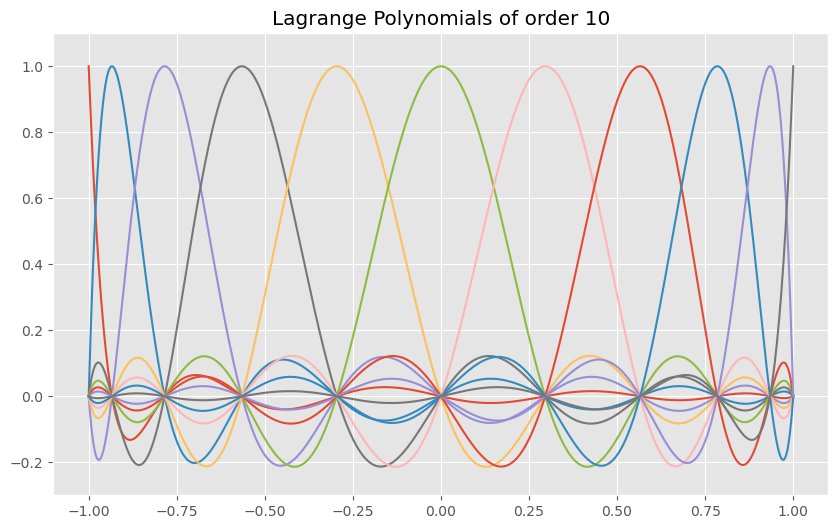

In [3]:
N = 10   # N_max = 12
x = np.linspace(-1, 1, 1000)
xi, _ = gll(N)

# -------------------------------
plt.figure(figsize=(10, 6))
for _i in range(-1,N):
    plt.plot(x, lagrange(N, _i, x, xi))
plt.ylim(-0.3, 1.1)
plt.title("Lagrange Polynomials of order %i" % N)
plt.show()

C:\Users\24248\AppData\Local\Temp\ipykernel_13592\1770126716.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, s, 'k-', color='green', label='Interpolating function')


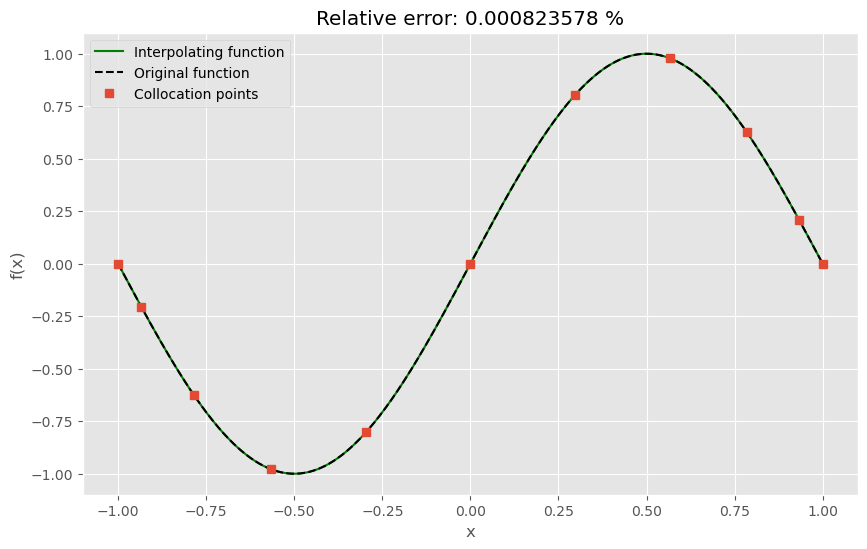

In [4]:
# Lagrange Interpolation
# ----------------------------------------------------------------
# Initialize space in the interval [-1, 1] for plotting the original and interpolated function
nx = 1000
x = np.linspace(-1, 1, nx)
    
# Define an arbitrary function you want to interpolate (change it!)
f = np.sin(np.pi * x)
    
# Give order of Lagrange polynomial
N = 10

# Get collocation points xi from gll routine (worth having a look)
[xi, w] = gll(N)
fi = np.interp(xi, x, f) 
  
# Initialize Lagrange polynomials on the defined grid
lp = np.zeros((N + 1, len(x)))
for i in range(0, len(x)):
    for j in range(-1, N):
        lp[j + 1, i] = lagrange(N, j, x[i], xi)
        
######################################################
# Calculate interpolating polynomials by multiplying 
# Lagrange polynomials with function values at xi
s = x * 0
for j in range(0, N + 1):   
    s = s + lp[j, :] * fi[j]
#
######################################################

# Calculate error of original and interpolated function
error = np.sum((np.abs(f - s))) / np.sum(np.abs(f)) * 100

# -------------------
# Plot results  
plt.figure(figsize=(10, 6))
plt.plot(x, s, 'k-', color='green', label='Interpolating function')
plt.plot(x, f, 'k--', label='Original function')
plt.plot(xi, fi, 's', label='Collocation points')
plt.title('Relative error: %g %%' % error)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend(loc="upper left")
plt.show()